In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob
from concurrent.futures import ProcessPoolExecutor, as_completed

import numpy as np
import pandas as pd

import settings as conf
import metadata
from utils import is_number, chunker
from results.multixcan import MXPhenoInfo, MXPhenoResults

# Load fastENLOC alpha1, se data

In [3]:
fastenloc_stats_filename = os.path.join(conf.ANALYSES_DIR, f'fastenloc-alpha1-stats.pkl.xz')
display(fastenloc_stats_filename)

'/mnt/phenomexcan_base/analyses/fastenloc-alpha1-stats.pkl.xz'

In [4]:
fastenloc_stats = pd.read_pickle(fastenloc_stats_filename)

In [5]:
fastenloc_stats.shape

(198401, 4)

In [6]:
fastenloc_stats.head()

,tissue,trait,alpha1,se
0,Adipose_Subcutaneous,O46,-12.018,1550.823
1,Adipose_Visceral_Omentum,O46,-11.835,1575.155
2,Adrenal_Gland,O46,-11.980,2014.509
3,Artery_Aorta,O46,-11.975,1679.678
4,Artery_Coronary,O46,-11.931,2131.642


# Plots

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution of alpha1 and se

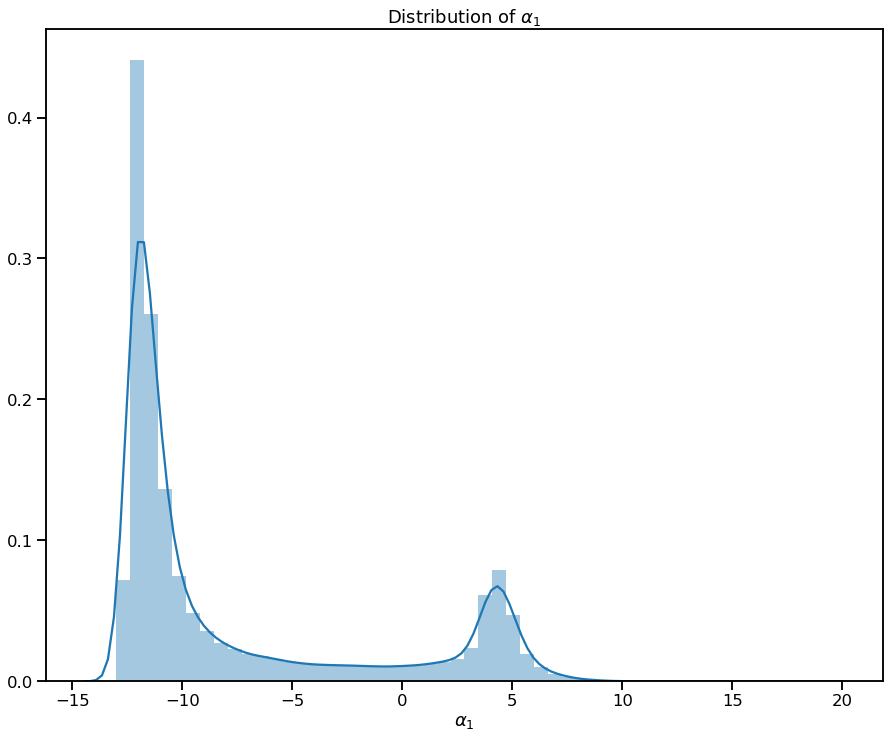

In [8]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats['alpha1'])
    ax.set_title(r'Distribution of $\alpha_1$')
    ax.set_xlabel(r'$\alpha_1$')

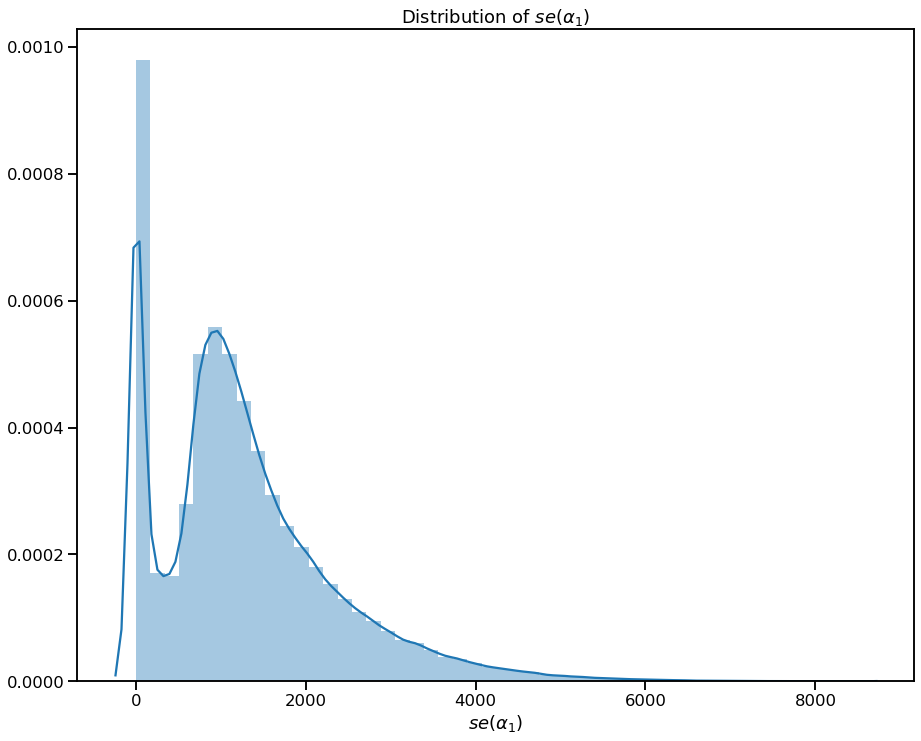

In [9]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats['se'])
    ax.set_title(r'Distribution of $se(\alpha_1$)')
    ax.set_xlabel(r'$se(\alpha_1)$')

## Distribution of se for negative and positive alpha1

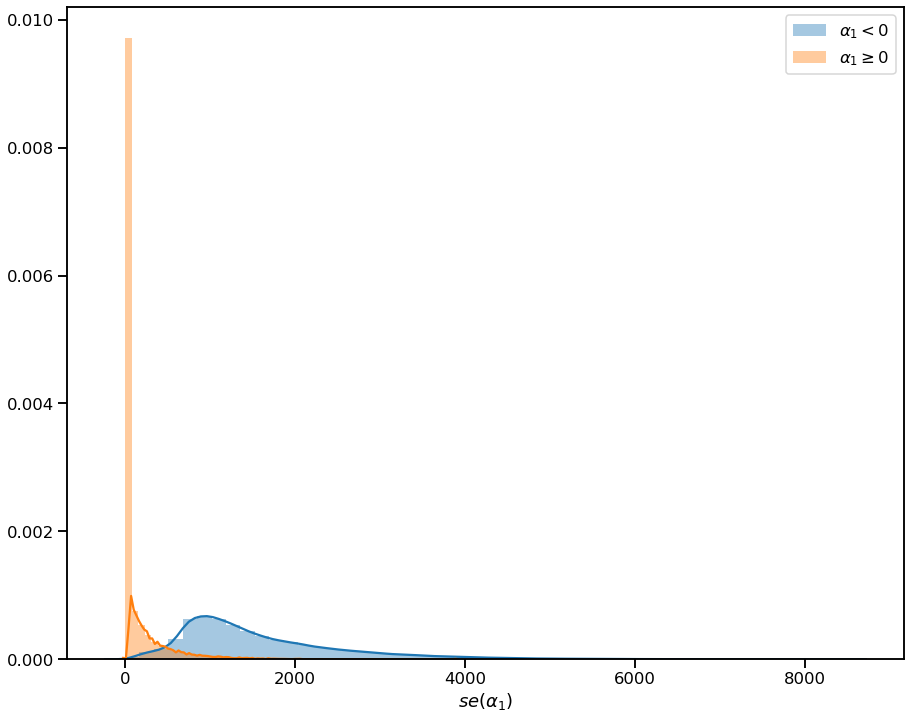

In [10]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats[fastenloc_stats['alpha1'] < 0]['se'], label=r'$\alpha_1 < 0$', ax=ax)
    ax = sns.distplot(fastenloc_stats[fastenloc_stats['alpha1'] >= 0]['se'], label=r'$\alpha_1 \geq 0$', ax=ax)
    ax.legend()
    ax.set_xlabel(r'$se(\alpha_1)$')

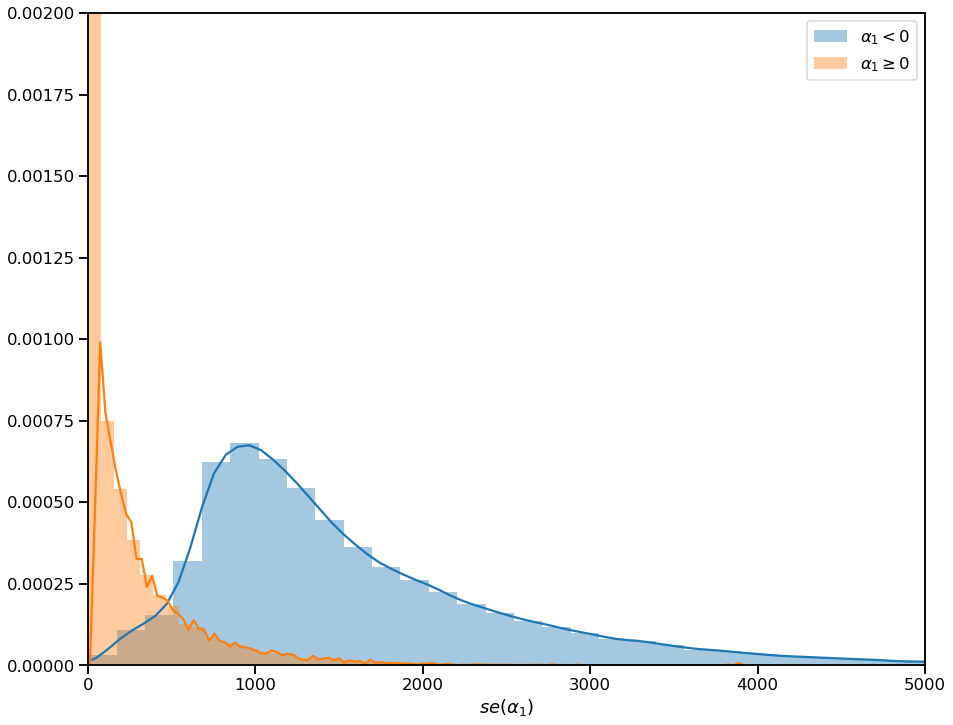

In [11]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.distplot(fastenloc_stats[fastenloc_stats['alpha1'] < 0]['se'], label=r'$\alpha_1 < 0$', ax=ax)
    ax = sns.distplot(fastenloc_stats[fastenloc_stats['alpha1'] >= 0]['se'], label=r'$\alpha_1 \geq 0$', ax=ax)
    ax.legend()
    ax.set_xlim(0, 5000)
    ax.set_ylim(0, 0.002)
    ax.set_xlabel(r'$se(\alpha_1)$')